In [ ]:
#identify the relationship between totalspend vs sales 
#our next ad campaign will have a total spend od $200000,how many units can we expect to see as a result of this
#data understanding

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('advertising.csv')
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [10]:
#data preprocessing
#data cleaning

In [11]:
df['total_spend']=df['TV']+df['newspaper']+df['radio']

In [13]:
df.drop(columns=["TV",'radio','newspaper'],inplace=True)
df

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


In [ ]:
#EDA

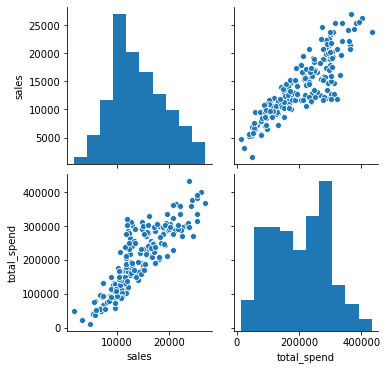

In [14]:
sns.pairplot(df)

In [15]:
df[['total_spend','sales']].corr()

,total_spend,sales
total_spend,1.000000,0.867712
sales,0.867712,1.000000


In [16]:
df['total_spend'].isnull().sum()

0

In [17]:
df.duplicated().sum()

0

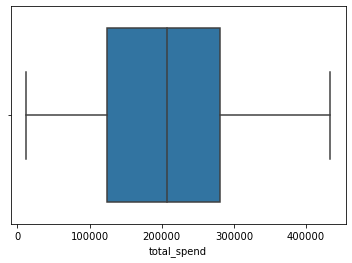

In [18]:
sns.boxplot(x='total_spend',data=df)

In [19]:
#data wrangling

In [20]:
df['total_spend'].skew()

0.04948799338306648

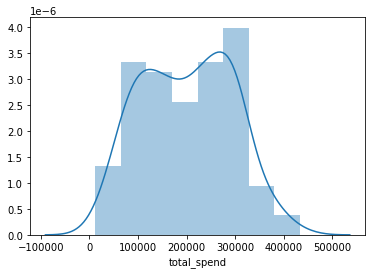

In [21]:
sns.distplot(df['total_spend'],kde=True)

In [22]:
#modelling

In [23]:
x=df[['total_spend']]
y=df['sales']

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
testscore=[]
trainscore=[]
cvs=[]
cscores=[]
for i in range(0,100):
 x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(x_train,y_train)
 y_test_pred=lrmodel.predict(x_test)
 y_train_pred=lrmodel.predict(x_train)
 testscore.append(lrmodel.score(x_test,y_test))
 trainscore.append(lrmodel.score(x_train,y_train))
 cvs=cross_val_score(lrmodel,x,y,cv=10)
 cvsm=cvs.mean()
 cscores.append(cvsm)


In [25]:
d=pd.DataFrame({'trainscore':trainscore,'testscore':testscore,'cvscore':cscores})
d

,trainscore,testscore,cvscore
0,0.732416,0.809938,0.728297
1,0.784262,0.539781,0.728297
2,0.814760,0.331335,0.728297
3,0.763672,0.703110,0.728297
4,0.770466,0.647104,0.728297
...,...,...,...
95,0.778736,0.613141,0.728297
96,0.771792,0.651022,0.728297
97,0.740711,0.788016,0.728297
98,0.732242,0.803706,0.728297


In [26]:
#model selection

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
cvs=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=97)
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
y_test_pred=lrmodel.predict(x_test)
y_train_pred=lrmodel.predict(x_train)
cvs=cross_val_score(lrmodel,x,y,cv=10)
cvsm=cvs.mean()

In [28]:
print('testscore : ',lrmodel.score(x_test,y_test))
print('trainscore : ',lrmodel.score(x_train,y_train))
print('cross validation score : ',cvsm)

testscore :  0.7880162303942173
trainscore :  0.7407113306687105
cross validation score :  0.7282971424371735


In [ ]:
#checking line assumptions for linear regression 

In [29]:
error=y_test-y_test_pred
error

85    -2425.314645
20     -673.805379
121   -1821.770826
55     4610.576672
145   -1369.698360
5     -3591.233150
167   -3257.489209
45     -448.861791
140    1492.585701
63     2826.209420
47     4507.302896
110   -4848.741568
22    -2645.573215
30     -338.987750
128    7301.386054
49     -278.888978
38      617.018801
58     5192.315658
56    -2655.837522
65     1030.812128
99     2148.682877
68     1340.806392
97      207.813384
183    2666.298381
106    -431.592155
146   -3424.053224
94      722.935643
141     280.602196
16    -2343.508149
119    -653.757656
168   -1436.840374
2     -1481.787288
122   -4358.119920
74      612.093338
12    -1222.844514
160    -580.473155
37     2151.836431
138     849.073143
176    1554.532208
0      1650.372477
Name: sales, dtype: float64

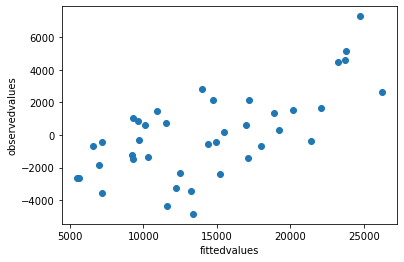

In [39]:
plt.scatter(y_test,error)
plt.ylabel('observedvalues')
plt.xlabel('fittedvalues')
plt.show()

In [37]:
error.skew()

0.5301801735935494

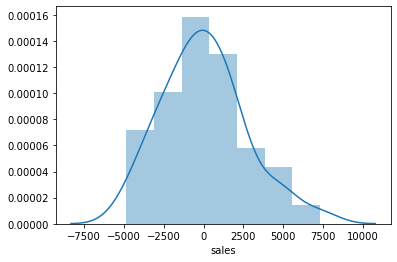

In [38]:
sns.distplot(error)

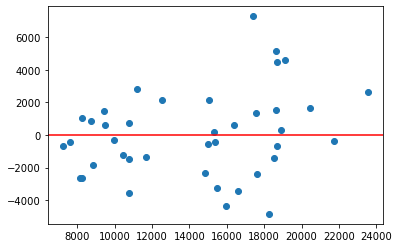

In [43]:
plt.scatter(y_test_pred,error)
plt.axhline(y=0,color='red')

In [45]:
import statsmodels.formula.api as smf
model2=smf.ols('y~x',data=df).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           5.06e-62
Time:                        17:14:23   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#final model

In [65]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
cvs=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=97)
#MODELLING
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
#PREDICTION
y_test_pred=lrmodel.predict(x_test)
y_train_pred=lrmodel.predict(x_train)
cvs=cross_val_score(lrmodel,x,y,cv=10)
cvsm=cvs.mean()
#EVALUATION
print("coeeficient : ",lrmodel.coef_)
print('intercept : ',lrmodel.intercept_)
print('testscore : ',lrmodel.score(x_test,y_test))
print('trainscore : ',lrmodel.score(x_train,y_train))
print('cross validation score : ',cvsm)

coeeficient :  [0.04722931]
intercept :  4528.626334599698
testscore :  0.7880162303942173
trainscore :  0.7407113306687105
cross validation score :  0.7282971424371735


In [52]:
#save the model

In [54]:
from joblib import dump
dump(lrmodel,'advertisingsales_model.joblib')

['advertisingsales_model.joblib']

In [55]:
#load model

In [56]:
from joblib import load
model_loaded=load('advertisingsales_model.joblib')

In [57]:
#predict

In [50]:
newdata=pd.DataFrame({'total_spend':[200000]})

In [51]:
newdata

,total_spend
0,200000


In [59]:
newdata['predicted sales']=pd.DataFrame(model_loaded.predict(newdata))

In [60]:
newdata

,total_spend,predicted sales
0,200000,13974.488802
